# Enron fraud detect

The purpose of this work is to detect if the person is involved in the scadal in Enron using their email and financial dataset. 

**Background** 

Enron was a giant company in the U.S., named as one of the most innovative companies, collapsed in several months after its financial fraud was uncovered. The collapse affected the lives of thousands of employees and shook Wall Street to its core, and lead to the bankrupcy of formerly one of the "Big Five" Arthur Andersen(now known as Accenture), who was handling the audit of Enron.

In [1]:
#!/usr/bin/python
import sys
sys.path.append("../tools/")
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Load the dictionary containing the dataset

Load the pkl data as dict file, then import the dict to pandas dataframe. 

In [2]:
data_dict = pickle.load(open("final_project_dataset.pkl", "rb")) 

#creating dataFrame from dictionary - pandas
df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=np.float)

In [3]:
df.head(10)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,NaN,4175000.0,phillip.allen@enron.com,-126027.0,-3081055.0,1729541.0,...,47.0,1729541.0,2195.0,152.0,65.0,0.0,304805.0,1407.0,126027.0,NaN
BADUM JAMES P,NaN,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,NaN,257817.0,...,NaN,257817.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,NaN,NaN,james.bannantine@enron.com,-560222.0,-5104.0,5243487.0,...,39.0,4046157.0,29.0,864523.0,0.0,0.0,NaN,465.0,1757552.0,NaN
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,...,NaN,6680544.0,NaN,2660303.0,NaN,0.0,1586055.0,NaN,3942714.0,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,frank.bay@enron.com,-82782.0,-201641.0,63014.0,...,NaN,NaN,NaN,69.0,NaN,0.0,NaN,NaN,145796.0,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694.0,860136.0,NaN,NaN,NaN,NaN,NaN,1599641.0,...,NaN,1599641.0,NaN,874.0,NaN,0.0,93750.0,NaN,NaN,NaN
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,sally.beck@enron.com,NaN,NaN,126027.0,...,144.0,NaN,4343.0,566.0,386.0,0.0,NaN,2639.0,126027.0,NaN
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,NaN,5249999.0,tim.belden@enron.com,NaN,-2334434.0,1110705.0,...,228.0,953136.0,484.0,210698.0,108.0,1.0,NaN,5521.0,157569.0,NaN
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,NaN,NaN,NaN,44093.0,NaN,-44093.0,...,NaN,3285.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,3285.0
BERBERIAN DAVID,216582.0,NaN,NaN,228474.0,NaN,NaN,david.berberian@enron.com,NaN,NaN,2493616.0,...,NaN,1624396.0,NaN,NaN,NaN,0.0,NaN,NaN,869220.0,NaN


In [4]:
df.shape

(146, 21)

The dataset includes 146 person, each has 21 features.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
loan_advances                4 non-null float64
bonus                        82 non-null float64
email_address                146 non-null object
restricted_stock_deferred    18 non-null float64
deferred_income              49 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
from_poi_to_this_person      86 non-null float64
exercised_stock_options      102 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null float64
long_term_incentive          66 non-null flo

Among all the 21 different features, lots of them have invalid value ('NaN'). For instance the "loan_advances" has only 4 value. Other features like 'defferral_payments' have slightly more values, which need to be checked one by one. 

## 1: Feature selection

Here I would like to remove the "email_address" feature, because it's a text and its information is correlated to the Name of the person. Since we don't know which of the other features might be more important, at the beginning we need to include all the rest features so as not to miss any important information. 

So let's create a list _Feature_list_ to include all the feature names from the dataset, **the first feature must be "poi" **. Almost all the feature names are read from the data_dict when loading the data (in the following steps). 

In [6]:
features_list = ['poi']  + [feature for feature in df if feature != 'poi' and feature != 'email_address']
## Select only the features from the list
df = df[features_list]
print ("The Features: ")
print (features_list)

The Features: 
['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']


In [7]:
print (df.iloc[0])

poi                                0.0
salary                        201955.0
to_messages                     2902.0
deferral_payments            2869717.0
total_payments               4484442.0
loan_advances                      NaN
bonus                        4175000.0
restricted_stock_deferred    -126027.0
deferred_income             -3081055.0
total_stock_value            1729541.0
expenses                       13868.0
from_poi_to_this_person           47.0
exercised_stock_options      1729541.0
from_messages                   2195.0
other                            152.0
from_this_person_to_poi           65.0
long_term_incentive           304805.0
shared_receipt_with_poi         1407.0
restricted_stock              126027.0
director_fees                      NaN
Name: ALLEN PHILLIP K, dtype: float64


## 2: Exploratory Data Analysis

### Outlier 1

By skimming at the data we can notice that "THE TRAVEL AGENCY IN THE PARK" and "LOCKHART EUGENE E" are the fake data. So we need to delete these two rows.

In [8]:
df = df.drop(['THE TRAVEL AGENCY IN THE PARK','LOCKHART EUGENE E'])

Now let's define a plot function so taht we can visualize all the data by different feature.

In [9]:
def outlier_plt(feature_idx):
    plt.title(features_list[feature_idx])
    print ("--- " + features_list[feature_idx] + " Distribution ---")
    df[features_list[feature_idx]].plot.hist(bins = 50, alpha = 0.5)

def print_outlier(feature_idx,cutoff):
    print ("--- " + features_list[feature_idx] + " Distribution ---")
    print (df[df[features_list[feature_idx]]>= cutoff].index)
    return df[df[features_list[feature_idx]]>= cutoff]

### Salary hist

--- salary Distribution ---


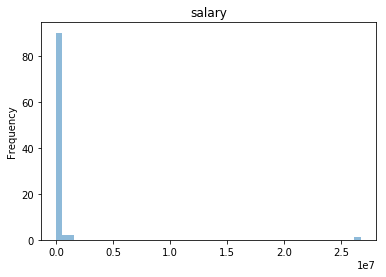

In [10]:
outlier_plt(1)

From the salary distribution plot, there is one obvious outlier which is much higher than the others. According to the axis, its value is higher than 0.5e7, so we can first print out the variables which has salary higher than 0.5e7

In [11]:
print_outlier(1,0.5e7 )

--- salary Distribution ---
Index(['TOTAL'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
TOTAL,0.0,26704229.0,NaN,32083396.0,309886585.0,83925000.0,97343619.0,-7576788.0,-27992891.0,434509511.0,5235198.0,NaN,311764000.0,NaN,42667589.0,NaN,48521928.0,NaN,130322299.0,1398517.0


This variable is called "Total", and its salary is way much higher than the others. So we can see that this is the total number of the whole table, so it shall be ticked off.

In [12]:
df = df.drop('TOTAL')

Now let's plot the salary distribution again

--- salary Distribution ---


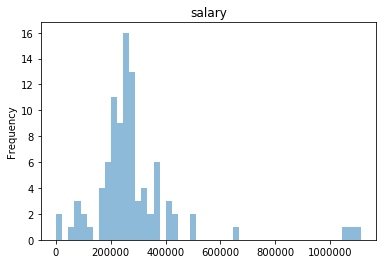

In [13]:
outlier_plt(1)

There're still some values much higher than the others, let's print them out

In [14]:
print_outlier(1, 8e5)

--- salary Distribution ---
Index(['FREVERT MARK A', 'LAY KENNETH L', 'SKILLING JEFFREY K'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
FREVERT MARK A,0.0,1060932.0,3275.0,6426990.0,17252530.0,2000000.0,2000000.0,NaN,-3367011.0,14622185.0,86987.0,242.0,10433518.0,21.0,7427621.0,6.0,1617011.0,2979.0,4188667.0,NaN
LAY KENNETH L,1.0,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,NaN,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,3600000.0,2411.0,14761694.0,NaN
SKILLING JEFFREY K,1.0,1111258.0,3627.0,NaN,8682716.0,NaN,5600000.0,NaN,NaN,26093672.0,29336.0,88.0,19250000.0,108.0,22122.0,30.0,1920000.0,2042.0,6843672.0,NaN


Three people have much higher salary than the others, including two 'poi's, which may contain important information for the prediction. So these numbers are reasonable, and for the salary distribution everything looks fine now.

### To_messages

--- to_messages Distribution ---


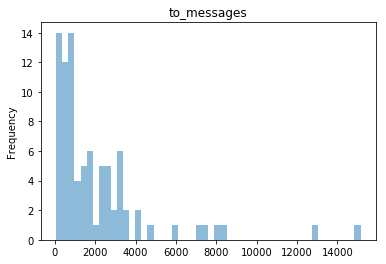

In [15]:
outlier_plt(2)

In [16]:
print_outlier(2,12000)

--- to_messages Distribution ---
Index(['KEAN STEVEN J', 'SHAPIRO RICHARD S'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
KEAN STEVEN J,0.0,404338.0,12754.0,NaN,1747522.0,NaN,1000000.0,NaN,NaN,6153642.0,41953.0,140.0,2022048.0,6759.0,1231.0,387.0,300000.0,3639.0,4131594.0,NaN
SHAPIRO RICHARD S,0.0,269076.0,15149.0,NaN,1057548.0,NaN,650000.0,NaN,NaN,987001.0,137767.0,74.0,607837.0,1215.0,705.0,65.0,NaN,4527.0,379164.0,NaN


## Deferral Payments

--- deferral_payments Distribution ---


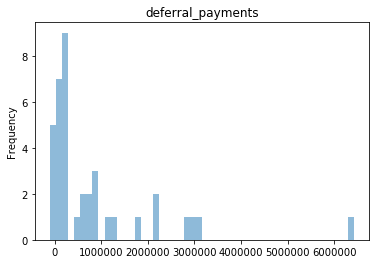

In [17]:
outlier_plt(3)

In [18]:
print_outlier(3,4000000)

--- deferral_payments Distribution ---
Index(['FREVERT MARK A'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
FREVERT MARK A,0.0,1060932.0,3275.0,6426990.0,17252530.0,2000000.0,2000000.0,NaN,-3367011.0,14622185.0,86987.0,242.0,10433518.0,21.0,7427621.0,6.0,1617011.0,2979.0,4188667.0,NaN


Well, good job, Mr. FREVERT MARK. We can't do anything.

In [19]:
print (df[df['deferral_payments']<= 0].index)
df[df['deferral_payments']<= 0]

Index(['BELFER ROBERT'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
BELFER ROBERT,0.0,NaN,NaN,-102500.0,102500.0,NaN,NaN,44093.0,NaN,-44093.0,NaN,NaN,3285.0,NaN,NaN,NaN,NaN,NaN,NaN,3285.0


### Total Payments

--- total_payments Distribution ---
--- total_payments Distribution ---
Index(['LAY KENNETH L'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1.0,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,NaN,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,3600000.0,2411.0,14761694.0,NaN


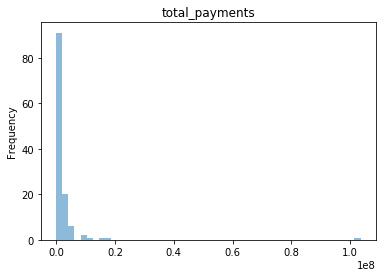

In [20]:
outlier_plt(4)
print_outlier(4,0.2e8)

Apparently Ken Lay got way much higher total payments than the others.

### Loan Advances

--- loan_advances Distribution ---
--- loan_advances Distribution ---
Index(['LAY KENNETH L'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
LAY KENNETH L,1.0,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,NaN,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,3600000.0,2411.0,14761694.0,NaN


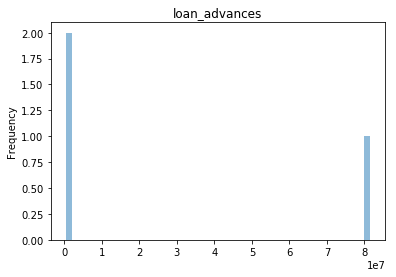

In [21]:
outlier_plt(5)
print_outlier(5,1.5e7)

### Bonus

--- bonus Distribution ---
--- bonus Distribution ---
Index(['BELDEN TIMOTHY N', 'LAVORATO JOHN J', 'LAY KENNETH L',
       'SKILLING JEFFREY K'],
      dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
BELDEN TIMOTHY N,1.0,213999.0,7991.0,2144013.0,5501630.0,NaN,5249999.0,NaN,-2334434.0,1110705.0,17355.0,228.0,953136.0,484.0,210698.0,108.0,NaN,5521.0,157569.0,NaN
LAVORATO JOHN J,0.0,339288.0,7259.0,NaN,10425757.0,NaN,8000000.0,NaN,NaN,5167144.0,49537.0,528.0,4158995.0,2585.0,1552.0,411.0,2035380.0,3962.0,1008149.0,NaN
LAY KENNETH L,1.0,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,NaN,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,3600000.0,2411.0,14761694.0,NaN
SKILLING JEFFREY K,1.0,1111258.0,3627.0,NaN,8682716.0,NaN,5600000.0,NaN,NaN,26093672.0,29336.0,88.0,19250000.0,108.0,22122.0,30.0,1920000.0,2042.0,6843672.0,NaN


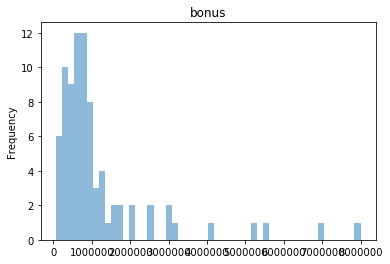

In [22]:
outlier_plt(6)
print_outlier(6,5e6)

### Restricted Stock

--- restricted_stock_deferred Distribution ---
--- restricted_stock_deferred Distribution ---
Index(['BHATNAGAR SANJAY'], dtype='object')
Index(['BHATNAGAR SANJAY'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
BHATNAGAR SANJAY,0.0,NaN,523.0,NaN,15456290.0,NaN,NaN,15456290.0,NaN,NaN,NaN,0.0,2604490.0,29.0,137864.0,1.0,NaN,463.0,-2604490.0,137864.0


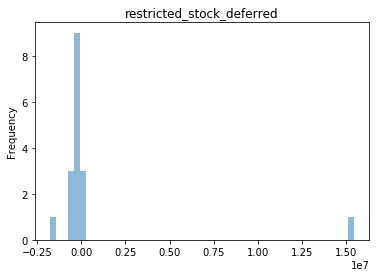

In [23]:
outlier_plt(7)
print_outlier(7,1e7)
print (df[df['restricted_stock']<= 0].index)
df[df['restricted_stock']< 0]

In [24]:
df[df['restricted_stock_deferred'] <0]

,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,0.0,201955.0,2902.0,2869717.0,4484442.0,NaN,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,304805.0,1407.0,126027.0,NaN
BANNANTINE JAMES M,0.0,477.0,566.0,NaN,916197.0,NaN,NaN,-560222.0,-5104.0,5243487.0,56301.0,39.0,4046157.0,29.0,864523.0,0.0,NaN,465.0,1757552.0,NaN
BAY FRANKLIN R,0.0,239671.0,NaN,260455.0,827696.0,NaN,400000.0,-82782.0,-201641.0,63014.0,129142.0,NaN,NaN,NaN,69.0,NaN,NaN,NaN,145796.0,NaN
CARTER REBECCA C,0.0,261809.0,312.0,NaN,477557.0,NaN,300000.0,-307301.0,-159792.0,NaN,NaN,29.0,NaN,15.0,540.0,7.0,75000.0,196.0,307301.0,NaN
CHAN RONNIE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-32460.0,-98784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32460.0,98784.0
CLINE KENNETH W,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-472568.0,NaN,189518.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,662086.0,NaN
DERRICK JR. JAMES V,0.0,492375.0,2181.0,NaN,550981.0,NaN,800000.0,-1787380.0,-1284000.0,8831913.0,51124.0,64.0,8831913.0,909.0,7482.0,20.0,484000.0,1401.0,1787380.0,NaN
DETMERING TIMOTHY J,0.0,210500.0,NaN,875307.0,1204583.0,NaN,425000.0,-315068.0,-775241.0,2027865.0,52255.0,NaN,2027865.0,NaN,1105.0,NaN,415657.0,NaN,315068.0,NaN
GATHMANN WILLIAM D,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-72419.0,NaN,1945360.0,NaN,NaN,1753766.0,NaN,NaN,NaN,NaN,NaN,264013.0,NaN
HAEDICKE MARK E,0.0,374125.0,4009.0,2157527.0,3859065.0,NaN,1150000.0,-329825.0,-934484.0,803094.0,76169.0,180.0,608750.0,1941.0,52382.0,61.0,983346.0,1847.0,524169.0,NaN


In [25]:
df = df.drop('restricted_stock_deferred',1)

--- deferred_income Distribution ---


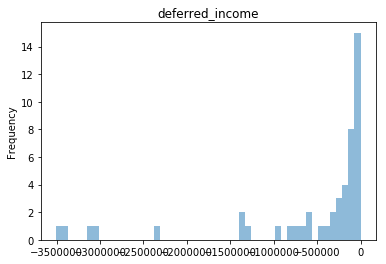

In [26]:
outlier_plt(8)
#print_outlier(8,4000)

### Total Stock Value

--- total_stock_value Distribution ---
--- total_stock_value Distribution ---
Index(['HIRKO JOSEPH', 'LAY KENNETH L', 'PAI LOU L', 'RICE KENNETH D',
       'SKILLING JEFFREY K', 'WHITE JR THOMAS E'],
      dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
HIRKO JOSEPH,1.0,NaN,NaN,10259.0,91093.0,NaN,NaN,NaN,30766064.0,77978.0,NaN,30766064.0,NaN,2856.0,NaN,NaN,NaN,NaN,NaN
LAY KENNETH L,1.0,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,3600000.0,2411.0,14761694.0,NaN
PAI LOU L,0.0,261879.0,NaN,NaN,3123383.0,NaN,1000000.0,NaN,23817930.0,32047.0,NaN,15364167.0,NaN,1829457.0,NaN,NaN,NaN,8453763.0,NaN
RICE KENNETH D,1.0,420636.0,905.0,NaN,505050.0,NaN,1750000.0,-3504386.0,22542539.0,46950.0,42.0,19794175.0,18.0,174839.0,4.0,1617011.0,864.0,2748364.0,NaN
SKILLING JEFFREY K,1.0,1111258.0,3627.0,NaN,8682716.0,NaN,5600000.0,NaN,26093672.0,29336.0,88.0,19250000.0,108.0,22122.0,30.0,1920000.0,2042.0,6843672.0,NaN
WHITE JR THOMAS E,0.0,317543.0,NaN,NaN,1934359.0,NaN,450000.0,NaN,15144123.0,81353.0,NaN,1297049.0,NaN,1085463.0,NaN,NaN,NaN,13847074.0,NaN


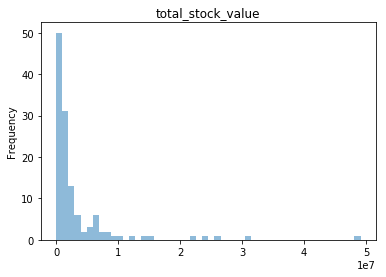

In [27]:
outlier_plt(9)
print_outlier(9,1.5e7)

--- expenses Distribution ---
--- expenses Distribution ---
Index([], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees


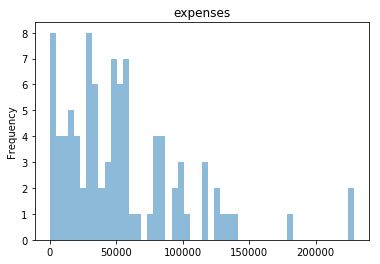

In [28]:
outlier_plt(10)
print_outlier(10,2e7)

--- from_poi_to_this_person Distribution ---


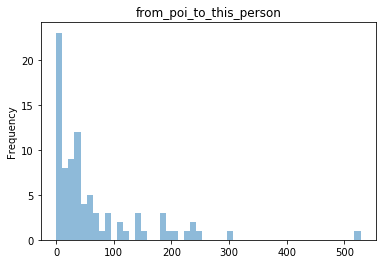

In [29]:
outlier_plt(11)
#print_outlier(11,200000)

--- exercised_stock_options Distribution ---
--- exercised_stock_options Distribution ---
Index(['FREVERT MARK A', 'HIRKO JOSEPH', 'LAY KENNETH L', 'PAI LOU L',
       'RICE KENNETH D', 'SKILLING JEFFREY K'],
      dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
FREVERT MARK A,0.0,1060932.0,3275.0,6426990.0,17252530.0,2000000.0,2000000.0,-3367011.0,14622185.0,86987.0,242.0,10433518.0,21.0,7427621.0,6.0,1617011.0,2979.0,4188667.0,NaN
HIRKO JOSEPH,1.0,NaN,NaN,10259.0,91093.0,NaN,NaN,NaN,30766064.0,77978.0,NaN,30766064.0,NaN,2856.0,NaN,NaN,NaN,NaN,NaN
LAY KENNETH L,1.0,1072321.0,4273.0,202911.0,103559793.0,81525000.0,7000000.0,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,3600000.0,2411.0,14761694.0,NaN
PAI LOU L,0.0,261879.0,NaN,NaN,3123383.0,NaN,1000000.0,NaN,23817930.0,32047.0,NaN,15364167.0,NaN,1829457.0,NaN,NaN,NaN,8453763.0,NaN
RICE KENNETH D,1.0,420636.0,905.0,NaN,505050.0,NaN,1750000.0,-3504386.0,22542539.0,46950.0,42.0,19794175.0,18.0,174839.0,4.0,1617011.0,864.0,2748364.0,NaN
SKILLING JEFFREY K,1.0,1111258.0,3627.0,NaN,8682716.0,NaN,5600000.0,NaN,26093672.0,29336.0,88.0,19250000.0,108.0,22122.0,30.0,1920000.0,2042.0,6843672.0,NaN


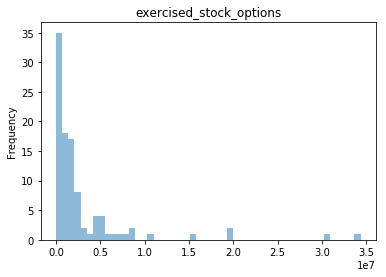

In [30]:
outlier_plt(12)
print_outlier(12,1e7)

In [31]:
df[df["loan_advances"] >0][['poi','loan_advances','director_fees']]

,poi,loan_advances,director_fees
FREVERT MARK A,0.0,2000000.0,NaN
LAY KENNETH L,1.0,81525000.0,NaN
PICKERING MARK R,0.0,400000.0,NaN


There are only 3 input for 'loan_advances', one of them ('Lay Kenneth') is poi. This input doesn't contain enough information for the model, thus it shall be dropped as well.

In [32]:
df = df.drop('loan_advances',1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 18 columns):
poi                        143 non-null float64
salary                     94 non-null float64
to_messages                86 non-null float64
deferral_payments          38 non-null float64
total_payments             123 non-null float64
bonus                      81 non-null float64
deferred_income            48 non-null float64
total_stock_value          125 non-null float64
expenses                   94 non-null float64
from_poi_to_this_person    86 non-null float64
exercised_stock_options    101 non-null float64
from_messages              86 non-null float64
other                      91 non-null float64
from_this_person_to_poi    86 non-null float64
long_term_incentive        65 non-null float64
shared_receipt_with_poi    86 non-null float64
restricted_stock           109 non-null float64
director_fees              16 non-null float64
dtypes: float64(18)
memory us

--- from_messages Distribution ---
--- from_messages Distribution ---
Index(['KAMINSKI WINCENTY J'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
KAMINSKI WINCENTY J,0.0,275101.0,4607.0,NaN,1086821.0,400000.0,NaN,976037.0,83585.0,41.0,850010.0,14368.0,4669.0,171.0,323466.0,583.0,126027.0,NaN


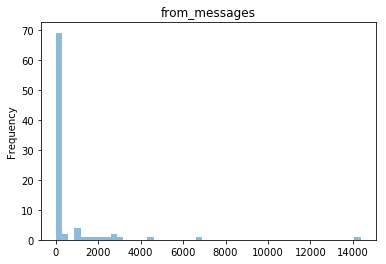

In [34]:
outlier_plt(13)
print_outlier(13,12000)

--- other Distribution ---
--- other Distribution ---
Index(['FREVERT MARK A', 'LAY KENNETH L'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
FREVERT MARK A,0.0,1060932.0,3275.0,6426990.0,17252530.0,2000000.0,-3367011.0,14622185.0,86987.0,242.0,10433518.0,21.0,7427621.0,6.0,1617011.0,2979.0,4188667.0,NaN
LAY KENNETH L,1.0,1072321.0,4273.0,202911.0,103559793.0,7000000.0,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,3600000.0,2411.0,14761694.0,NaN


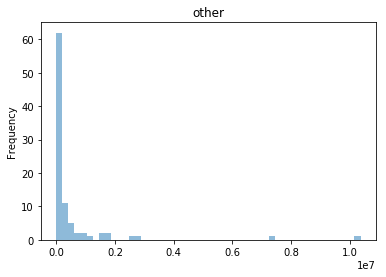

In [35]:
outlier_plt(14)
print_outlier(14,0.6e7)

--- from_this_person_to_poi Distribution ---
--- from_this_person_to_poi Distribution ---
Index(['BECK SALLY W', 'DELAINEY DAVID W', 'KEAN STEVEN J', 'LAVORATO JOHN J'], dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
BECK SALLY W,0.0,231330.0,7315.0,NaN,969068.0,700000.0,NaN,126027.0,37172.0,144.0,NaN,4343.0,566.0,386.0,NaN,2639.0,126027.0,NaN
DELAINEY DAVID W,1.0,365163.0,3093.0,NaN,4747979.0,3000000.0,NaN,3614261.0,86174.0,66.0,2291113.0,3069.0,1661.0,609.0,1294981.0,2097.0,1323148.0,NaN
KEAN STEVEN J,0.0,404338.0,12754.0,NaN,1747522.0,1000000.0,NaN,6153642.0,41953.0,140.0,2022048.0,6759.0,1231.0,387.0,300000.0,3639.0,4131594.0,NaN
LAVORATO JOHN J,0.0,339288.0,7259.0,NaN,10425757.0,8000000.0,NaN,5167144.0,49537.0,528.0,4158995.0,2585.0,1552.0,411.0,2035380.0,3962.0,1008149.0,NaN


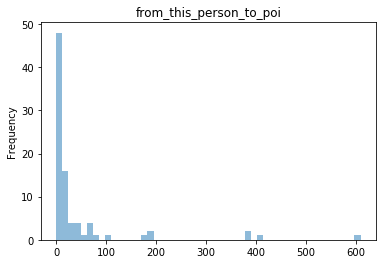

In [36]:
outlier_plt(15)
print_outlier(15,300)

--- long_term_incentive Distribution ---


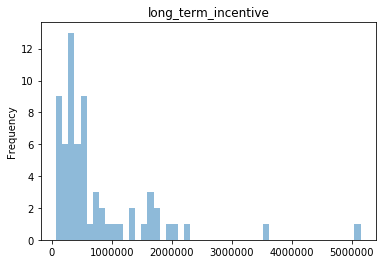

In [37]:
outlier_plt(16)
#print_outlier(16,1e7)

--- shared_receipt_with_poi Distribution ---


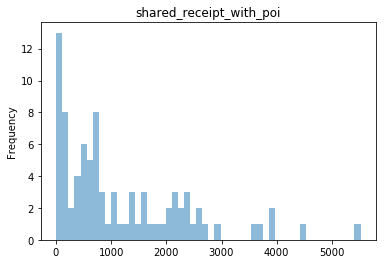

In [38]:
outlier_plt(17)
#print_outlier(7,1e7)

--- restricted_stock Distribution ---
--- restricted_stock Distribution ---
Index(['BAXTER JOHN C', 'FREVERT MARK A', 'IZZO LAWRENCE L', 'KEAN STEVEN J',
       'LAY KENNETH L', 'PAI LOU L', 'SKILLING JEFFREY K', 'WHITE JR THOMAS E',
       'YEAGER F SCOTT'],
      dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
BAXTER JOHN C,0.0,267102.0,NaN,1295738.0,5634343.0,1200000.0,-1386055.0,10623258.0,11200.0,NaN,6680544.0,NaN,2660303.0,NaN,1586055.0,NaN,3942714.0,NaN
FREVERT MARK A,0.0,1060932.0,3275.0,6426990.0,17252530.0,2000000.0,-3367011.0,14622185.0,86987.0,242.0,10433518.0,21.0,7427621.0,6.0,1617011.0,2979.0,4188667.0,NaN
IZZO LAWRENCE L,0.0,85274.0,496.0,NaN,1979596.0,NaN,NaN,5819980.0,28093.0,28.0,2165172.0,19.0,1553729.0,5.0,312500.0,437.0,3654808.0,NaN
KEAN STEVEN J,0.0,404338.0,12754.0,NaN,1747522.0,1000000.0,NaN,6153642.0,41953.0,140.0,2022048.0,6759.0,1231.0,387.0,300000.0,3639.0,4131594.0,NaN
LAY KENNETH L,1.0,1072321.0,4273.0,202911.0,103559793.0,7000000.0,-300000.0,49110078.0,99832.0,123.0,34348384.0,36.0,10359729.0,16.0,3600000.0,2411.0,14761694.0,NaN
PAI LOU L,0.0,261879.0,NaN,NaN,3123383.0,1000000.0,NaN,23817930.0,32047.0,NaN,15364167.0,NaN,1829457.0,NaN,NaN,NaN,8453763.0,NaN
SKILLING JEFFREY K,1.0,1111258.0,3627.0,NaN,8682716.0,5600000.0,NaN,26093672.0,29336.0,88.0,19250000.0,108.0,22122.0,30.0,1920000.0,2042.0,6843672.0,NaN
WHITE JR THOMAS E,0.0,317543.0,NaN,NaN,1934359.0,450000.0,NaN,15144123.0,81353.0,NaN,1297049.0,NaN,1085463.0,NaN,NaN,NaN,13847074.0,NaN
YEAGER F SCOTT,1.0,158403.0,NaN,NaN,360300.0,NaN,NaN,11884758.0,53947.0,NaN,8308552.0,NaN,147950.0,NaN,NaN,NaN,3576206.0,NaN


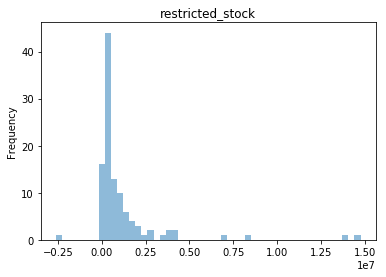

In [39]:
outlier_plt(18)
print_outlier(18,3000000)

--- director_fees Distribution ---
--- director_fees Distribution ---
Index(['BELFER ROBERT', 'BHATNAGAR SANJAY', 'BLAKE JR. NORMAN P',
       'CHAN RONNIE', 'DUNCAN JOHN H', 'GRAMM WENDY L', 'JAEDICKE ROBERT',
       'LEMAISTRE CHARLES', 'MENDELSOHN JOHN', 'MEYER JEROME J',
       'PEREIRA PAULO V. FERRAZ', 'POWERS WILLIAM', 'SAVAGE FRANK',
       'URQUHART JOHN A', 'WAKEHAM JOHN', 'WINOKUR JR. HERBERT S'],
      dtype='object')


,poi,salary,to_messages,deferral_payments,total_payments,bonus,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
BELFER ROBERT,0.0,NaN,NaN,-102500.0,102500.0,NaN,NaN,-44093.0,NaN,NaN,3285.0,NaN,NaN,NaN,NaN,NaN,NaN,3285.0
BHATNAGAR SANJAY,0.0,NaN,523.0,NaN,15456290.0,NaN,NaN,NaN,NaN,0.0,2604490.0,29.0,137864.0,1.0,NaN,463.0,-2604490.0,137864.0
BLAKE JR. NORMAN P,0.0,NaN,NaN,NaN,1279.0,NaN,-113784.0,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113784.0
CHAN RONNIE,0.0,NaN,NaN,NaN,NaN,NaN,-98784.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32460.0,98784.0
DUNCAN JOHN H,0.0,NaN,NaN,NaN,77492.0,NaN,-25000.0,371750.0,NaN,NaN,371750.0,NaN,NaN,NaN,NaN,NaN,NaN,102492.0
GRAMM WENDY L,0.0,NaN,NaN,NaN,119292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119292.0
JAEDICKE ROBERT,0.0,NaN,NaN,NaN,83750.0,NaN,-25000.0,431750.0,NaN,NaN,431750.0,NaN,NaN,NaN,NaN,NaN,44093.0,108750.0
LEMAISTRE CHARLES,0.0,NaN,NaN,NaN,87492.0,NaN,-25000.0,412878.0,NaN,NaN,412878.0,NaN,NaN,NaN,NaN,NaN,NaN,112492.0
MENDELSOHN JOHN,0.0,NaN,NaN,NaN,148.0,NaN,-103750.0,NaN,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103750.0
MEYER JEROME J,0.0,NaN,NaN,NaN,2151.0,NaN,-38346.0,NaN,2151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38346.0


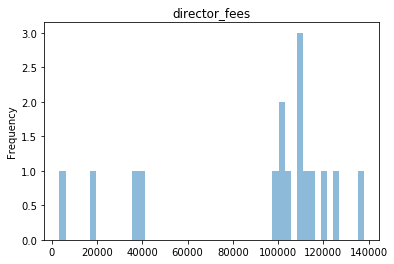

In [40]:
outlier_plt(19)
print_outlier(19,500)

In [41]:
df[df["director_fees"] >0][['poi','director_fees']]

,poi,director_fees
BELFER ROBERT,0.0,3285.0
BHATNAGAR SANJAY,0.0,137864.0
BLAKE JR. NORMAN P,0.0,113784.0
CHAN RONNIE,0.0,98784.0
DUNCAN JOHN H,0.0,102492.0
GRAMM WENDY L,0.0,119292.0
JAEDICKE ROBERT,0.0,108750.0
LEMAISTRE CHARLES,0.0,112492.0
MENDELSOHN JOHN,0.0,103750.0
MEYER JEROME J,0.0,38346.0


Among the 17 people with a 'director_fees' data, none of them are 'poi'. This means the data may not contribute to the prediction, so the feature 'director_fees' shall also be removed. 

In [42]:
df = df.drop('director_fees',1)

** Outlier summary**

In total we found three outliers here in this dataset. By skimming the dataset we can see that "THE TRAVEL AGENCY IN THE PARK" and "LOCKHART EUGENE E" are the fake data. So we need to delete these two rows. Another outlier "TOTAL" was found by visualizing the data. This is the total amount of the other data, which shall also be omitted.

During the exploratory analysis, we also notice some values are way much higher than the other. For these cases, there are still reasonable data because some of them already indicate the poi, or some individuals have higher emails because of their positions.  

In [43]:
features_list.remove('restricted_stock_deferred')
features_list.remove('loan_advances')
features_list.remove('director_fees')

### 3: Create new feature(s)

We can see from the data that _email_ is also an important feature, but in real life, due to the position situation, some people will have much more messages than the others. So here we can create a **"to_poi_ratio"**, which is the ratio of the from_this_person_to_poi/from_messages, to indicate the ratio of this person recieving from the pois among all the messages, and likewise **"from_poi_ratio"** as the ratio of the from_poi_to_this_person/to_messages, indicating that the ratio of this person sending from the pois among all the messages.

In [44]:
features_list.append("to_poi_ratio")
features_list.append("from_poi_ratio")

df['to_poi_ratio'] = df['from_this_person_to_poi']/df['from_messages']
df['from_poi_ratio'] = df['from_poi_to_this_person']/df['to_messages']

## Pre-porcess the data

In the table there're lots of values missing, so we shall fill in these values with 0.

In [45]:
df = df.fillna(0)

In [46]:
print ("There are in total {} person".format(df.shape[0]))
print ("For each person there are {} features after deleting the uneccessary features".format(df.shape[1]))
print ("Among which there are {} POIs".format(df['poi'].sum()))

There are in total 143 person
For each person there are 19 features after deleting the uneccessary features
Among which there are 18.0 POIs


In [47]:
labels = df['poi']
features = df.drop('poi', 1)  # where 1 is the axis number (0 for rows and 1 for columns.)

Use scatter plot for different features to see if there are direct relationships and/or obvious decision boundary between each features

In [48]:
print (features_list)

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'bonus', 'deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'to_poi_ratio', 'from_poi_ratio']


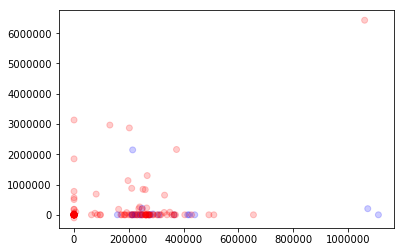

In [49]:
colors = np.where(df.poi ==0, 'r', 'b')
plt.scatter(df.salary, df.deferral_payments, color = colors, alpha = 0.2)

**Cross validation**
- Split the dataset into train and test data. 70% of the data will be used for training, the rest 30% will be used for testing.
- Use random_state(default = 42) to get same sampling, which will be helpful to analyze the algorithm.

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.7, random_state=42)
features_train, features_test, labels_train, labels_test = sss(features, labels)

TypeError: 'StratifiedShuffleSplit' object is not callable

## Try a varity of classifiers

**Select K Best features**

- SelectKBest removes all but the k highest scoring features
- f_classif: Compute the ANOVA F-value for the provided sample.

** Pipeline **

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

** GridSearchCV**

- GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.
- The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

** Use pipeline to search for the appropriate amount of features (based on the final scores of precision/recall) **

In [60]:
pipe = Pipeline([
    ('reduce_dim', SelectKBest()),
    ('classify', GaussianNB())
])

N_FEATURES_OPTIONS = range(1,19)
param_grid = [
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': N_FEATURES_OPTIONS
    }
]
reducer_labels = ['SelectKBest']

In [61]:
grid = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid, scoring='precision')
grid2 = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid, scoring='recall')
grid3 = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid, scoring='f1')

grid.fit(features_train, labels_train)
grid2.fit(features_train, labels_train)
grid3.fit(features_train, labels_train)

mean_scores1 = np.array(grid.cv_results_['mean_test_score'])
mean_scores2 = np.array(grid2.cv_results_['mean_test_score'])
mean_scores3 = np.array(grid3.cv_results_['mean_test_score'])

mean_scores4 = mean_scores3.reshape(1, -1, len(N_FEATURES_OPTIONS))

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/si

In [ ]:
np.argmax(mean_scores2)

In [ ]:
plt.plot(N_FEATURES_OPTIONS, mean_scores1, 'g')
plt.scatter(N_FEATURES_OPTIONS, mean_scores1, s=10, c = "g")

plt.plot(N_FEATURES_OPTIONS, mean_scores2, 'b')
plt.scatter(N_FEATURES_OPTIONS, mean_scores2, s=10, c = "b")

plt.plot(N_FEATURES_OPTIONS, mean_scores3, 'r')
plt.scatter(N_FEATURES_OPTIONS, mean_scores3, s=10, c = "r")

plt.xticks(N_FEATURES_OPTIONS, N_FEATURES_OPTIONS)
plt.grid()
plt.show()

From the graph we can see that the F1 scores the highest at k=9, while precision and recall are both high.

After fitting the classifier, select "K Best" scores of the feautrues.

Here we are running the gridsearch again to check if we can get the same results from the model

In [ ]:
from sklearn.model_selection import GridSearchCV
skb = SelectKBest(f_classif)
pipeline =  Pipeline(steps=[("SKB", skb), ("NaiveBayes", GaussianNB())])
params_skb = {'SKB__k': [5,7,9,13,17]} # Use pipeline to search for the best amount of features
clf = GridSearchCV(pipeline, param_grid = params_skb, scoring = 'f1')
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

In [ ]:
# here we use i+1 becuase the first feature in the list is poi, which shall not be included in the fitting.
features_selected = [features_list[i+1] for i in clf.best_estimator_.named_steps['SKB'].get_support(indices=True)]
print ('The Features Selected:')
print (features_selected)

print ("The best estimator:")
print (clf.best_estimator_)

In [ ]:
features_scores = SelectKBest(k=9).fit(features, labels)
print (features_scores.scores_)

In [ ]:
scores = pd.Series(features_scores.scores_, index = features.columns)

In [ ]:
scores.plot(kind = "barh", figsize = (6,8), color = np.where(scores > 8.6, 'g', 'b'), alpha = 0.75)

From the best estimator we can find that the best case is when k=9, which matches the score graph aforementioned. And from the chart, all the green bars are the ones with much higher scores.

### Select K-Best
In order to see how much KBest helps to optimize the results, hereby I used Naive Bayes without KBest.

First we need to create a new dataframe to store the columns with the selected features

In [ ]:
features_train_k =pd.DataFrame()
features_test_k =pd.DataFrame()
for feature in features_selected:
    features_train_k[feature] = features_train[feature]
    features_test_k[feature] = features_test[feature]

This can also be done with the transform function

In [55]:
features_train_kk = features_scores.transform(features_train)

NameError: name 'features_scores' is not defined

Now let's test the samples with Naive Bayes algorithm. And here we will compare the results before/after the KBest

### NaiveBayes

In [56]:
# Without KBest
clf_0 = GaussianNB()
clf_0.fit(features_train, labels_train)
pred_0 = clf_0.predict(features_test)

In [57]:
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

acc_0 = accuracy_score(pred_0, labels_test)
rec_sc_0 = recall_score(labels_test, pred_0)
pre_sc_0 = average_precision_score(labels_test, pred_0)
print ("Accuracy before KBest:", acc_0)
print ("Precision before KBest:", pre_sc_0)
print ("Recall before KBest:", rec_sc_0)

Accuracy before KBest: 0.860465116279
Precision before KBest: 0.22976744186
Recall before KBest: 0.4


In [58]:
clf = GaussianNB()
clf.fit(features_train_k, labels_train)
pred = clf.predict(features_test_k)

NameError: name 'features_train_k' is not defined

In [59]:
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score

rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print ("Accuracy after KBest:", acc)
print ("Precision after KBest:", pre_sc)
print ("Recall after KBest:", rec_sc)

NameError: name 'pred' is not defined

As shown in the results, all the metrics are slightly lower after the KBest. We can see that the NaiveBayes doesn't require parameter optimization.

### KNN

First we will try it without tuning, and without kbest

In [60]:
# Using KNN without tuning the parameters
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print ("Accuracy before KBest:", acc)
print ("Precision before KBest:", pre_sc)
print ("Recall before KBest:", rec_sc)

Accuracy before KBest: 0.883720930233
Precision before KBest: 0.116279069767
Recall before KBest: 0.0


In [61]:
clf_k = KNeighborsClassifier()
clf_k.fit(features_train_k, labels_train)
pred_k = clf_k.predict(features_test_k)
rec_sc_k = recall_score(labels_test, pred_k)
pre_sc_k = average_precision_score(labels_test, pred_k)
acc_k = accuracy_score(pred_k, labels_test)
print ("Accuracy after KBest:", acc_k)
print ("Precision after KBest:", pre_sc_k)
print ("Recall after KBest:", rec_sc_k)

NameError: name 'features_train_k' is not defined

With KBest, nothing has changed.

In [62]:
# Using GridSearchCV for KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,3,5,7,9],'leaf_size':[1, 3, 5, 10, 30,50], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights' : ['uniform', 'distance']}
clf = GridSearchCV(knn,parameters, scoring = 'f1')
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print (clf.best_estimator_)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print ("Accuracy after tuning:", acc)
print ("Precision after tuning:", pre_sc)
print ("Recall after tuning:", rec_sc)

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Accuracy after tuning: 0.906976744186
Precision after tuning: 0.336434108527
Recall after tuning: 0.4


/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-pac

** After tuning the parameters, the metrics are all improved than before.** And the KBest doesn't really affect the results

### DecisionTree

In [63]:
#Using DecisionTreeClassifier without tuning the parameters
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print ("Accuracy before tuning:", acc)
print ("Precision before tuning:", pre_sc)
print ("Recall before tuning:", rec_sc)

Accuracy before tuning: 0.860465116279
Precision before tuning: 0.22976744186
Recall before tuning: 0.4


In [64]:
#Using DecisionTreeClassifier after tuning the parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
parameters = {'min_samples_split':[2, 3, 4,5, 7,10],  
               "min_impurity_split":[6e-07,5.5e-07,7e-07, 8e-07],
                "min_samples_leaf":[1,3, 5,7,8,9,10] , "random_state": [46]           
             }
clf = GridSearchCV(dt, parameters, scoring = 'f1')
clf.fit(features_train, labels_train)
print (clf.best_estimator_)
pred = clf.predict(features_test)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print ("Accuracy after tuning:", acc)
print ("Precision after tuning:", pre_sc)
print ("Recall after tuning:", rec_sc)

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xueming

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarnin

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarnin

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_fo

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xueming

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_fo

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=6e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=46,
            splitter='best')
Accuracy after tuning: 0.860465116279
Precision after tuning: 0.159689922481
Recall after tuning: 0.2


/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarnin

In [65]:
#Using DecisionTreeClassifier after tuning the parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
parameters = {'min_samples_split':[2, 3, 4,5, 7,10],  
               "min_impurity_split":[6e-07,5.5e-07,7e-07, 8e-07],
                "min_samples_leaf":[1,3, 5,7,8,9,10] , "random_state": [46]           
             }
clf = GridSearchCV(dt, parameters, scoring = 'f1')
clf.fit(features_train_k, labels_train)
print (clf.best_estimator_)
pred = clf.predict(features_test_k)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print ("Accuracy after tuning:", acc)
print ("Precision after tuning:", pre_sc)
print ("Recall after tuning:", rec_sc)

NameError: name 'features_train_k' is not defined

### Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print ("Accuracy:", acc)
print ("Precision:", pre_sc)
print ("Recall:", rec_sc)

In [ ]:
# use a full grid over all parameters
clf = RandomForestClassifier()
param_grid = {"max_depth": [3, None],
              "max_features": [1, 10],
              "min_samples_split": [3,10],
              "min_samples_leaf": [1,  10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
grid_search.fit(features_train, labels_train)

In [ ]:
print (grid_search.best_estimator_)

In [ ]:
pred = grid_search.predict(features_test)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print ("Accuracy after tuning:", acc)
print ("Precision after tuning:", pre_sc)
print ("Recall after tuning:", rec_sc)

### SVM

In [ ]:
from sklearn.svm import SVC
parameters = {'C':[1,5,10],'gamma':[0.01, 0.001, 0.0001] , 'kernel':['rbf']}
sv = SVC()
clf = GridSearchCV(sv,parameters)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)
print (clf.best_estimator_)
rec_sc = recall_score(labels_test, pred)
pre_sc = average_precision_score(labels_test, pred)
acc = accuracy_score(pred, labels_test)
print ("Accuracy after tuning:", acc)
print ("Precision after tuning:", pre_sc)
print ("Recall after tuning:", rec_sc)

### 5: Dump the classifier, dataset, and features_list 


#### from tester import dump_classifier_and_data
from tester import dump_classifier_and_data
dump_classifier_and_data(clf, df, features_list)